# Telecom churn Case Study

Problem Statement:

In the telecom industry, retaining high profitable customers is the number one business goal. We will you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. 

Key points to consider


- prepaid is the most common model in India
- use the usage-based definition to define churn
- working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

We will build (two) models to predict churn.

 - To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


This seems to be a classical binary classification problem and few of the algorithms could be 
- logistic regression, 
- support vector machines
- random forests and gradient boosting, 
- decision trees, etc


<h2><font size="6" color="Brown">1) Data understanding, preparation, and feature engineering </h2>
 

##### . Modify default configurations of pandas library. Increase max columns and ignore warnings

In [117]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',40)
pd.options.display.float_format = '{:.8f}'.format
%config IPCompleter.greedy=True
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [118]:
### Read telecom data
telecom_data = pd.read_csv('telecom_churn_data.csv', encoding='ISO-8859-1', dtype='object')
telecom_data.head(4)



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,5.44,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/

In [119]:
#Shape 
telecom_data.shape

(99999, 226)

In [120]:
telecom_data['total_rech_data_6'].fillna('0',inplace=True)
telecom_data['total_rech_data_7'].fillna('0',inplace=True)

telecom_data['av_rech_amt_data_6'].fillna('0',inplace=True)
telecom_data['av_rech_amt_data_7'].fillna('0',inplace=True)

telecom_data['total_rech_amt_6'].fillna('0',inplace=True)
telecom_data['total_rech_amt_7'].fillna('0',inplace=True)

### Create dummy variables for categorical variables

In [121]:
# Categorical variables treatment and dummy creation
categorical_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']


for v in categorical_vars:
    # Impute nan as 0 for categoricals
     telecom_data[v].fillna('0',inplace=True)


for v in categorical_vars:
    # add dummy
    cont = pd.get_dummies(telecom_data[v],prefix=v,drop_first=True)
    telecom_data = pd.concat([telecom_data,cont],axis=1)

In [122]:
# drop the categorical vars now
telecom_data = telecom_data.drop(categorical_vars,axis=1)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
0,7000842753,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,5.44,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,

### Data cleanups and datatype conversions

In [123]:
#count the null values in each column

na_cols = telecom_data.isna().sum()
print(na_cols)


mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
                        ...  
monthly_3g_6                0
monthly_3g_7                0
monthly_3g_8                0
monthly_3g_9                0
sachet_3g_6                 0
sachet_3g_7                 0
sachet_3g_8                 0
sachet_3g_9                 0
fb_user_9               74077
aon                         0
aug_vbc_3g                  0
jul_vbc_3g                  0
jun_vbc_3g

In [124]:
# Ensure None of the churner attributes is in the Big Null count columns
churner_attributes = ('total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9')

# Big na columns
na_cols = na_cols[na_cols.values > (0.4*len(telecom_data))]

print (set(na_cols.index.tolist()).intersection(set(churner_attributes)))

set()


In [125]:
# Drop the column having more than 40% null values

main_df = telecom_data.dropna(thresh=len(telecom_data)*0.4, axis=1)
main_df.shape

(99999, 196)

In [126]:
#check for columns having only one unique value, ie same value for all the rows.
unique = main_df.nunique()
unique = unique[unique.values == 1]
print (unique)

### Delete the columns with unique value 1
main_df.drop(labels = list(unique.index), axis=1, inplace=True)
main_df.shape

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


(99999, 180)

In [127]:
# We will drop any rows having > 100 na values. 
print (len(main_df[main_df.isnull().sum(axis=1) > 100].index))
main_df.drop(main_df[main_df.isnull().sum(axis=1) > 100].index, axis=0, inplace=True)
main_df.shape
main_df = main_df.set_index('mobile_number')

1018


In [128]:
# calculate the percentage of missing values in each column of the dataframe
round(100*(main_df.isnull().sum()/len(main_df.index)),2)

arpu_6               0.00000000
arpu_7               0.00000000
arpu_8               0.00000000
arpu_9               0.00000000
onnet_mou_6          2.95000000
onnet_mou_7          2.87000000
onnet_mou_8          4.40000000
onnet_mou_9          6.80000000
offnet_mou_6         2.95000000
offnet_mou_7         2.87000000
offnet_mou_8         4.40000000
offnet_mou_9         6.80000000
roam_ic_mou_6        2.95000000
roam_ic_mou_7        2.87000000
roam_ic_mou_8        4.40000000
roam_ic_mou_9        6.80000000
roam_og_mou_6        2.95000000
roam_og_mou_7        2.87000000
roam_og_mou_8        4.40000000
roam_og_mou_9        6.80000000
                        ...    
sachet_2g_9          0.00000000
monthly_3g_6         0.00000000
monthly_3g_7         0.00000000
monthly_3g_8         0.00000000
monthly_3g_9         0.00000000
sachet_3g_6          0.00000000
sachet_3g_7          0.00000000
sachet_3g_8          0.00000000
sachet_3g_9          0.00000000
aon                  0.00000000
aug_vbc_

In [129]:
# Impute some missing values

# All MOUs / OG / IC with 0 
for col in [ col for col in main_df.columns if any(ext in col for ext in ['_mou_', 'og_', 'ic_'])]:
    main_df[col].fillna('0',inplace=True)


In [130]:
round(100*(main_df.isnull().sum()/len(main_df.index)),2)

arpu_6               0.00000000
arpu_7               0.00000000
arpu_8               0.00000000
arpu_9               0.00000000
onnet_mou_6          0.00000000
onnet_mou_7          0.00000000
onnet_mou_8          0.00000000
onnet_mou_9          0.00000000
offnet_mou_6         0.00000000
offnet_mou_7         0.00000000
offnet_mou_8         0.00000000
offnet_mou_9         0.00000000
roam_ic_mou_6        0.00000000
roam_ic_mou_7        0.00000000
roam_ic_mou_8        0.00000000
roam_ic_mou_9        0.00000000
roam_og_mou_6        0.00000000
roam_og_mou_7        0.00000000
roam_og_mou_8        0.00000000
roam_og_mou_9        0.00000000
                        ...    
sachet_2g_9          0.00000000
monthly_3g_6         0.00000000
monthly_3g_7         0.00000000
monthly_3g_8         0.00000000
monthly_3g_9         0.00000000
sachet_3g_6          0.00000000
sachet_3g_7          0.00000000
sachet_3g_8          0.00000000
sachet_3g_9          0.00000000
aon                  0.00000000
aug_vbc_

##### We see that data is clean to work with 

In [131]:
## Common Util functions

# convert columns to float type
def convert_to_numeric(df, column_exclusions_pattern=['mobile','date','churned']):
    float_columns = [col for col in df.columns if not [v for v in column_exclusions_pattern if v in col]]
    for c in float_columns:
        df[c] = df[c].astype(float)
    return df

In [132]:
# Convert datatypes 
    
main_df = convert_to_numeric(main_df)

date_columns = [ col for col in main_df.columns if 'date' in col]

# For date columns, replace nan with empty string
for col in date_columns:
    main_df[col].fillna('',inplace=True)
    main_df[col] = main_df[col].apply(lambda x : datetime(1970, 12, 31) \
                                      if not x else datetime.strptime(str(x), '%m/%d/%Y'))  

main_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.38500000,214.81600000,213.80300000,21.10000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.16000000,0.00000000,0.00000000,0.00000000,4.13000000,0.00000000,0.00000000,0.00000000,1.15000000,0.00000000,0.00000000,0.00000000,5.44000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5.4

### Outlier treatment with IQR 

In [133]:
outlier_range  = (0.0001, 0.9999)
float_columns = [c for c in main_df.select_dtypes(['float', 'integer']).columns]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
main_df[float_columns].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
count,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000

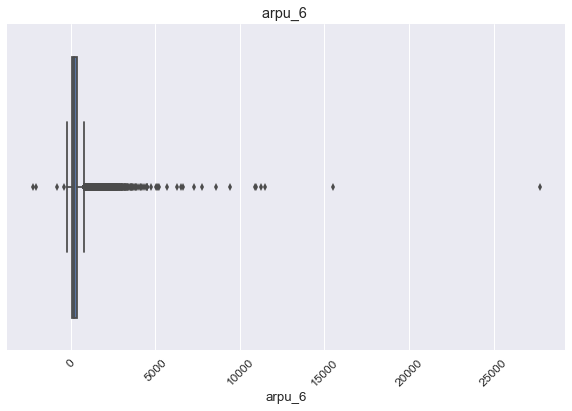

In [134]:
# Lets check one of the variables with box plot 
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.boxplot(data =main_df, x='arpu_6')
plt.title('arpu_6 ')
plt.xticks(rotation=45)
plt.show()

#### From the boxplot and the precentile table above, it is clear most of the columns have outliers at the min and max levels. 
#### Here, we will play safe to treat the extreme outliers and hence not loose important data. 

so the outlier range for us is [.0001 , .9999] 

In [135]:
def IQR (df, column):
    q1 = df[column].quantile(outlier_range[0])
    q3 = df[column].quantile(outlier_range[1])
    iqr = (df[column] >= q1) & (df[column] <= q3)
    return df.loc[iqr]

for c in float_columns:
    main_df = IQR(main_df, c)

main_df[float_columns].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
count,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000

In [136]:
main_df.shape

(97323, 179)

In [137]:
#Save the cleaned dataset 

main_df.to_pickle("./dummy.pkl")


In [138]:
unpickled_df = pd.read_pickle("./dummy.pkl")
df = unpickled_df


### Filter high-value customers

you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After filtering the high-value customers, you should get about 29.9k rows.

In [139]:
avg_recharge_f2m = df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)
X = np.percentile(avg_recharge_f2m, 70)
print (X)

364.0


In [140]:
df = df[avg_recharge_f2m >= X]

df.shape

(29201, 179)

### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [141]:
df['churned'] = df.apply(lambda row : 
                         1 if (
                             row.total_ic_mou_9 == 0.0 and 
                             row.total_og_mou_9 == 0.0 and 
                             row.vol_2g_mb_9 == 0.0 and 
                             row.vol_3g_mb_9 == 0.0
                         ) 
                         else 
                         0, 
                         axis=1
                        )

df.head(5)


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,500.00000000,57.84000000,54.68000000,52.29000000,0.00000000,453.43000000,567.16000000,325.91000000,0.00000000,16.23000000,33.49000000,31.64000000,0.00000000,23.74000000,12.59000000,38.06000000,0.00000000,51.39000000,31.38000000,40.28000000,0.00000000,308.63000000,447.38000000,162.28000000,0.00000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,0.00000000,4.30000000,23.29000000,12.01000000,0.00000000,49.89000000,31.76000000,49.14000000,0.00000000,6.66000000,20.08000000,16.68000000,0.00000000,60.86000000,75.14000000,77.84000000,0.00000000,0.00000000,0.18000000,10.01000000,0.00000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,0.00000000,58.14000000,32.26000000,27.31000000,0.00000000,217.56000000,221.49000000,121.19000000,0.00000000,152.16000000,101.46000000,39.53000000,0.00000000,427.88000000,355.23000000,188.04000000,0.00000000,36.89000000,11.83000000,30.39000000,0.00000000,91.44000000,126.99000000,141.33000000,0.00000000,52.19000000,34.2400000

In [142]:
# remove any or all attr with '_9'
df = df.drop(columns = [col for col in df.columns if '_9' in col])
print (df.shape)
df.head(3)

(29201, 139)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,2014-06-27,2014-07-25,2014-08-26,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,802.00000000,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1
7001524846,378.72100000,492.22300000,137.36200000,413.69000000,351.03000000,35.08000000,94.66000000,80.63000000,136.48000000,0.00000000,0.00000000,0.00000000,0

## Derive new features

In [148]:
def day_diff_from(column, df):
    # For the date columns missing values, we imputed earlier with infinity start == 1970/12/31.... 
    #   Now those get replaced as 0 for days
    return [v.days for v in (df[column].dt.to_pydatetime() - datetime(1970, 12, 31))]

#Extract the day of recharge from the date (0 for missing values in original dataset)
df['day_of_last_rech_6'] =  day_diff_from('date_of_last_rech_6', df)
df['day_of_last_rech_7'] = day_diff_from('date_of_last_rech_7', df)
df['day_of_last_rech_8'] = day_diff_from('date_of_last_rech_8', df)
df = df.drop(columns = [col for col in df.columns if 'date_of_last_rech_' in col])


In [149]:
# total amount = total number of recharges * avg amount
df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

#Total Data+Call amount
df['total_amt_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']
df['total_amt_7'] = df['total_rech_amt_7'] + df['total_data_rech_7']

#Average amount
df['avg_amt_6_7'] = df[['total_amt_6', 'total_amt_7']].mean(axis=1)

df = convert_to_numeric(df)

In [150]:
#Average outgoing calls for 6th and 7th month
df['avg_og_mou_6_7'] = df[['total_og_mou_6', 'total_og_mou_7']].mean(axis=1)

#Outgoing calls usage differnce b/w 8th month and avg of 6th and 7th month. To get insight of customers who are about to churn.
df['usage_diff_og_mou'] = df['avg_og_mou_6_7'] - df['total_og_mou_8']

df = df.drop(['avg_og_mou_6_7'], axis=1)

In [151]:
# Convert Age on network in months
df['aon'] = df['aon']/30.41

In [152]:
df['aon'].head()

mobile_number
7000701601   26.37290365
7001524846   10.35843473
7002191713   85.72837882
7000875565   16.80368300
7000187447   21.93357448
Name: aon, dtype: float64

#### Categorize users based on the network type -> 2g, 3g, both

In [153]:
def find_2g_user(df):
    return df['vol_2g_mb_8']>0 or df['monthly_2g_8']>0 or df['sachet_2g_8']>0

df['2g_user'] = df.apply(find_2g_user, axis=1)

def find_3g_user(df):
    return df[ 'vol_3g_mb_8']>0 or df[ 'monthly_3g_8']>0 or df[ 'sachet_3g_8']>0 or df[ 'aug_vbc_3g']>0

df['3g_user'] = df.apply(find_3g_user, axis=1)


def assign_user_type(df):
    if df['2g_user']:
        return '2g'
    elif df['3g_user']:
        return '3g'
    else:
        return 'both'
df['user_type'] = df.apply(assign_user_type, axis=1)
df = df.drop(['2g_user','3g_user'], axis=1)

In [154]:
def find_monthly_user(df):
    return df['monthly_2g_8']>0 or df['monthly_3g_8']>0

df['monthly_user'] = df.apply(find_monthly_user, axis=1)

def find_sachet_user(df):
    return df[ 'sachet_2g_8']>0 or df[ 'sachet_3g_8']>0

df['sachet_user'] = df.apply(find_sachet_user, axis=1)

def find_fb_user(df):
    return df['fb_user_8_1']>0 

df['fb_user'] = df.apply(find_fb_user, axis=1)

def find_night_user(df):
    return df['night_pck_user_8_1']>0 

df['night_user'] = df.apply(find_night_user, axis=1)

def assign_service_type(df):
    if df['monthly_user']:
        return 'monthly'
    elif df['sachet_user']:
        return 'sachet'
    elif df['fb_user']:
        return 'fb'
    elif df['night_user']:
        return 'night'
    else:
        return 'none'
    
df['service_used'] = df.apply(assign_service_type, axis=1)
df = df.drop(['monthly_user','sachet_user','fb_user','night_user'], axis=1)

In [155]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,user_type,service_used
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,26.37290365,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1,15884.00000000,15912.00000000,15944.00000000,0.00000000,0.00000000,1580.000

<h2><font size="6" color="Brown">2) EDA </h2>


## Univariate Analysis

## 1) Outgoing calls

#### In this section, we will analyse outgoing calls duration of the churned customers. A graph is plotted on derived continuous variable 
[ usage_diff_og_mou = avg of outgoing call of 6th and 7th month - total outgoing call in 8th month ]



If the difference is more then customer has not utilised the outgoing calls in the 8th month


In [156]:
def univariate_continuous(df,col,lbl,title):
    sns.distplot(df[col])
    plt.xlabel(lbl)
    plt.title(title)
    plt.show()

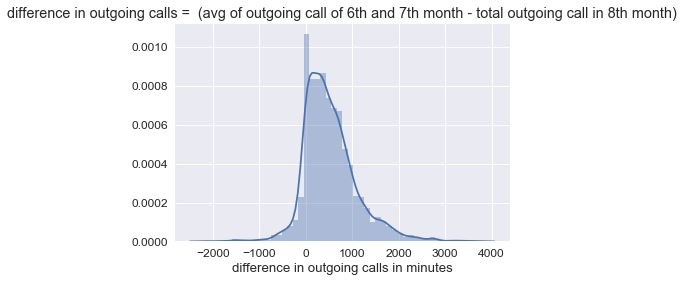

In [157]:
univariate_continuous(df=df[df['churned']==1],col='usage_diff_og_mou',title ='difference in outgoing calls =  (avg of outgoing call of 6th and 7th month - total outgoing call in 8th month)',lbl = 'difference in outgoing calls in minutes')

### Lets take a closer look at the above graph and plot difference in outgoing calls in the range -500 to 2000 mins

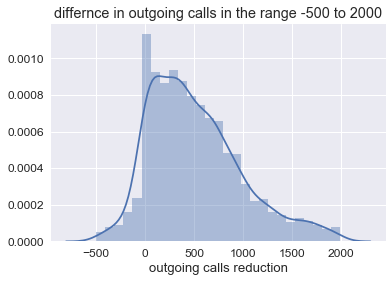

In [158]:
univariate_continuous(df=df[df['churned']==1].loc[(df[df['churned']==1]['usage_diff_og_mou']>=-500) & (df[df['churned']==1]['usage_diff_og_mou']<=2000)],col='usage_diff_og_mou', lbl='outgoing calls reduction', title='differnce in outgoing calls in the range -500 to 2000')

### Customers whose outgoing calls have reduced in the 8th month approximatelty in the range 100 to 500 minutes have churned more in number

## 2) Age on network

### In this section, we will analyse the customers who have churned against the no. of months they were in the network

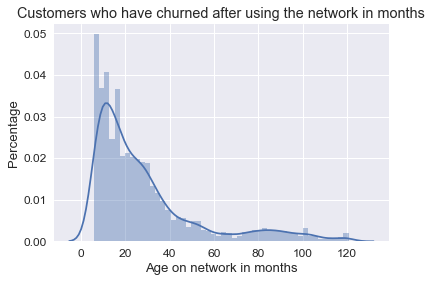

In [159]:
sns.distplot(df[df['churned']==1]['aon'], bins=50)
plt.xlabel('Age on network in months')
plt.ylabel('Percentage')
plt.title('Customers who have churned after using the network in months')
plt.show()

#### Customers are less likely to churn who have high age on network. 

## 3) Recharge Amount

### In this section, we will analyse the customers who have churned against the recharge amount  done in the 8th month

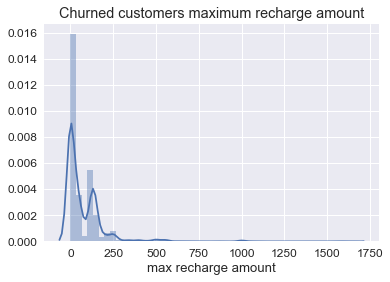

In [160]:
univariate_continuous(df=df[df['churned']==1],col='max_rech_amt_8',lbl='max recharge amount', title='Churned customers maximum recharge amount')

### Customers who have recharged less than 200 is more likely to churn

## Bivariate Analysis

## 1) Type of network -> 2g, 3g, both

#### We will analyse the churned customers based on the network type used. 'user_type' derived variable is used here for analysis.

In [161]:
df[['user_type', 'churned']].groupby(['user_type', 'churned']).size()/df.groupby(['user_type']).size()

user_type  churned
2g         0         0.97186167
           1         0.02813833
3g         0         0.92213115
           1         0.07786885
both       0         0.87551590
           1         0.12448410
dtype: float64

#### Percentage wise customers who have churned and not churned from different types of network

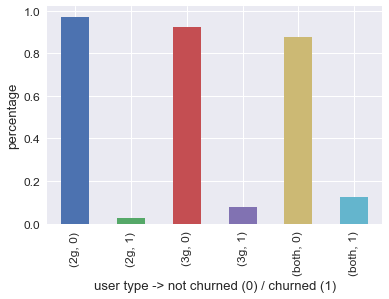

In [162]:
(df[['user_type', 'churned']].groupby(['user_type', 'churned']).size()/df.groupby(['user_type']).size()).plot.bar()
plt.xlabel("user type -> not churned (0) / churned (1)")
plt.ylabel("percentage")
plt.show()

#### Customers who have churned percentage wise after using different network types. 
#### Assumption: Here 'both' could imply customers who have switched from 2g to 3g network
#### Analysis outcome: 7.7% and 12.4% of customers who used 3g and both types of networks have churned respectively

## 2) Service package usage

#### We will analyse the churned customers based on the service package used. 'service_used' derived variable is used here for analysis.

In [163]:
(df[['service_used', 'churned']].groupby(['service_used', 'churned']).size()/df.groupby(['service_used']).size())

service_used  churned
monthly       0         0.98633106
              1         0.01366894
none          0         0.87879969
              1         0.12120031
sachet        0         0.95515267
              1         0.04484733
dtype: float64

#### Customers who are using packages are not likely to churn compared to others who do not use any package (which is around 12%)

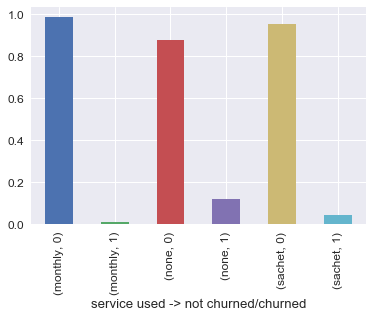

In [164]:
(df[['service_used', 'churned']].groupby(['service_used', 'churned']).size()/df.groupby(['service_used']).size()).plot.bar()
plt.xlabel("service used -> not churned/churned")
plt.show()

#### Above graph provides pictorial representation
#### 12.12% of customers who do not use any package have churned

## 3) Average revenue per user

### Customers who have churned/not churned based on average revenue per from each month

#### Shows churned cumstomer show gradual decline in average reveunes from 6th to 8th month

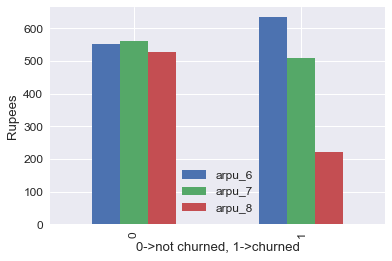

In [165]:
df.groupby('churned')['arpu_6','arpu_7','arpu_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Rupees')
plt.show()

## 4) Total outgoing and incoming minutes 

### Customers who have churned/not churned based on total outgoing minutes of usage

#### Shows churned cumstomer make very few Incoming and outgoing calls compared to good customers

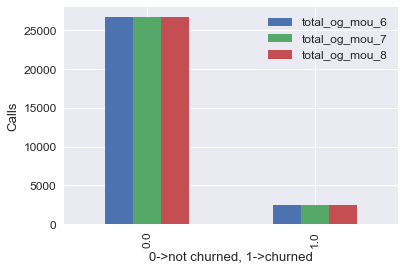

In [216]:
df.groupby('churned')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

### Customers who have churned/not churned based on incoming calls

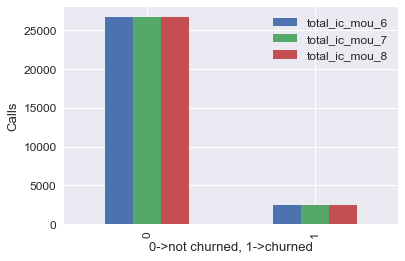

In [167]:
df.groupby('churned')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

## 5) Average total recharge
### In the below graph, total avg recharge of users is plotted for 3 months

#### Shows churned cumstomer show gradual decline in average recharge from 6th to 8th month

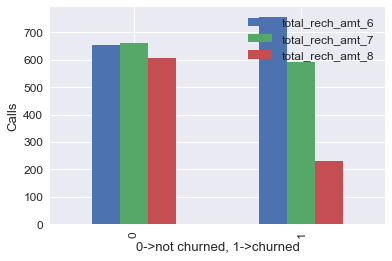

In [168]:
df.groupby('churned')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

<h2><font size="6" color="Brown">3) Data Normalisation and Class Imbalance Checks </h2>


### Convert categorical variables to dummy variables

In [169]:
categorical_vars = ['service_used','user_type']


for v in categorical_vars:
    # Impute nan as 0 for categoricals
     df[v].fillna('0',inplace=True)


for v in categorical_vars:
    # add dummy
    cont = pd.get_dummies(df[v],prefix=v,drop_first=True)
    df = pd.concat([df,cont],axis=1)


In [170]:
df = df.drop(categorical_vars,axis=1)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,26.37290365,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1,15884.00000000,15912.00000000,

In [171]:
# Data snapshot before Normalisation
df.to_pickle("./dummy_1.pkl")


## Normalise data

In [172]:
df = convert_to_numeric(df)

#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
df_others = df.select_dtypes(include=[np.datetime64,object])
df_floats = df.select_dtypes(exclude=[np.datetime64,object]).apply(normalize)

df = pd.concat([df_others, df_floats], axis=1)
print(df.shape)

df.head()

(29201, 149)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.26161614,0.39403305,0.82935831,0.01388822,0.01374436,0.01322930,0.10858440,0.13214845,0.07888972,0.00911895,0.02139813,0.02010638,0.01260493,0.00842964,0.02344347,0.01569309,0.01012604,0.01455576,0.11887622,0.17024953,0.06961252,0.17489585,0.17389385,0.20652596,0.00000000,0.00000000,0.00000000,0.12689939,0.16788514,0.09217126,0.00105351,0.00594154,0.00315533,0.01231794,0.00784742,0.01211013,0.02641704,0.07781136,0.07729737,0.01410076,0.01753506,0.01918191,0.00000000,0.00064199,0.03240111,0.01329827,0.00000000,0.01593098,0.00000000,0.00000000,0.00000000,0.11026748,0.13908128,0.08429445,0.01757807,0.01076794,0.00948086,0.06655592,0.08506218,0.04660544,0.15017617,0.10082080,0.05166915,0.12762898,0.11278468,0.06287744,0.01841011,0.00861987,0.02085134,0.04806914,0.06357351,0.08572000,0.10058590,0.06612464,0.05240185,0.08857120,0.08642592,0.11222341,0.18183401,0.17370462,0.14076710,0.21000000,0.00000000,0.00000000,0.00158524,0.00940070,0.02248783,0.04572391,0.04310687,0.04379647,0.05154639,0.05882353,0.08536585,0.38035628,0.18579492,0.90950000,0.79000000,0.37619048,0.92995880,0.00000000,0.00000000,0.51933333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.15484192,0.01348388,0.00426512,0.00422839,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.99981117,0.99962307,0.99968650,0.00000000,0.00000000,0.06022489,0.02571531,0.03409681,0.51145923,1.00000000,0.00000000,1.00000000,0.00000000
7001524

In [173]:
# Data snapshot after Normalisation
df.to_pickle("./dummy_2.pkl")


## Check and handle class imbalance


In [174]:
print ((sum(df['churned'])/len(df['churned'].index))*100)

8.540803397143934



<h5><font size="4" color="red">There is class imbalance as churned rate is < 10%  </h5>

### We will use SMOTE algorithm to resolve the class imbalance

In [175]:
unpickled_df = pd.read_pickle("./dummy_2.pkl")
df = unpickled_df
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# pip install imbalanced-learn

# Putting feature variable to X
df = df.reset_index()
X = df.drop(['churned','mobile_number'],axis=1)

# Putting response variable to y
y = df['churned']

y.head()

0   1.00000000
1   0.00000000
2   0.00000000
3   0.00000000
4   0.00000000
Name: churned, dtype: float64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1757
Before OverSampling, counts of label '0': 18683 

After SMOTE, the shape of train_X: (37366, 148)
After SMOTE, the shape of train_y: (37366,) 

After SMOTE, counts of label '1': 18683
After SMOTE, counts of label '0': 18683


In [177]:
X.shape

(29201, 148)

In [178]:
print (X_test.shape, y_test.shape, sum(y_test == 0))

(8761, 148) (8761,) 8024


In [179]:
# Similarly SMOTE out test data 
X_test_res, y_test_res = sm.fit_sample(X_test, y_test)
print (X_test_res.shape, y_test_res.shape, sum(y_test_res == 0))

(16048, 148) (16048,) 8024


In [180]:
X_train_res_df = pd.DataFrame(X_train_res,columns=X.columns)
y_train_res_df  = pd.DataFrame(y_train_res,columns=['churned'])
X_test_res_df = pd.DataFrame(X_test_res,columns=X.columns)
y_test_res_df = pd.DataFrame(y_test_res,columns=['churned'])


<h2><font size="6" color="Brown">4)  MODEL ONE : For Churn Prediction.... </h2>


#### Here we will try various classification models to pick one for Churn prediction



<h3><font size="4" color="Green">Mobile telecom companies prefer models with **high sensitivity** rather than models with high specificity because the cost that is associated with the incorrect classification of churners is higher than the cost associated with the incorrect classification of a non-churner.</h3>

<h3><font size="4" color="Green">Thus a compromise between high sensitivity combined with reasonable specificity will be made in our recommendation so this company can effectively manage their marketing budget to achieve high customer retention.</h3>


### Optimal variable selection using PCA.

In [181]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [182]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [183]:
pca.components_

array([[ 3.24459037e-03,  1.58835010e-02,  3.30489932e-02, ...,
         2.15331958e-01,  3.19739484e-02, -4.80238558e-01],
       [-5.10164027e-03,  2.20223488e-02,  4.48189522e-02, ...,
         4.55008245e-01, -9.36391039e-02, -2.48511032e-01],
       [ 9.26324999e-02,  1.51516468e-01,  1.29770540e-01, ...,
        -1.74590937e-01, -5.57879543e-02,  1.21910881e-01],
       ...,
       [ 0.00000000e+00,  1.59848021e-16,  1.31396800e-16, ...,
        -1.39357263e-17, -1.16211826e-17,  2.73046394e-17],
       [ 0.00000000e+00,  2.78999576e-16,  9.96484844e-17, ...,
        -1.77386856e-17, -2.74704997e-17, -2.70236670e-17],
       [-0.00000000e+00, -2.89662079e-16, -1.01741766e-16, ...,
        -3.38907974e-17, -4.62707102e-17, -5.30523634e-17]])

In [184]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.00324459,-0.00510164,arpu_6
1,0.01588350,0.02202235,arpu_7
2,0.03304899,0.04481895,arpu_8
3,-0.02124163,0.04716072,onnet_mou_6
4,-0.01524275,0.06237865,onnet_mou_7
5,-0.00149933,0.05265642,onnet_mou_8
6,-0.01591806,0.03635179,offnet_mou_6
7,-0.00799999,0.05610725,offnet_mou_7
8,0.00711937,0.05329276,offnet_mou_8
9,-0.00069276,0.00001116,roam_ic_mou_6


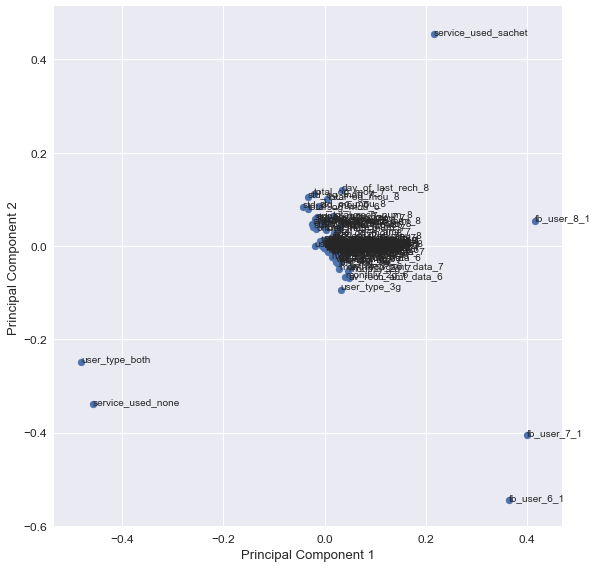

In [185]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

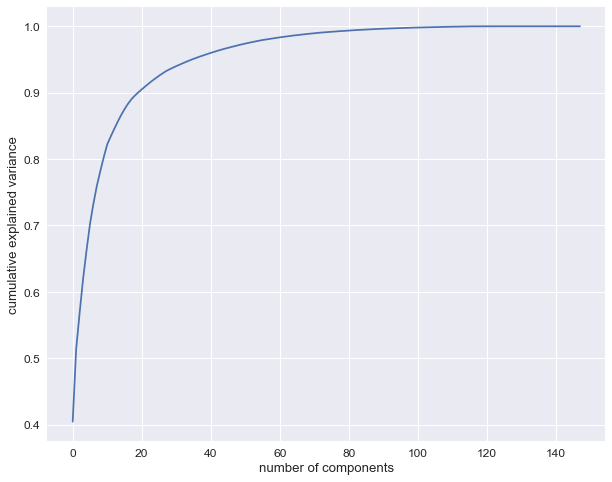

In [186]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 15 components are required to describe 86% of the variance in the dataset
- First We'll choose 15 components for our modeling

In [193]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [194]:
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(37366, 15)

In [195]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

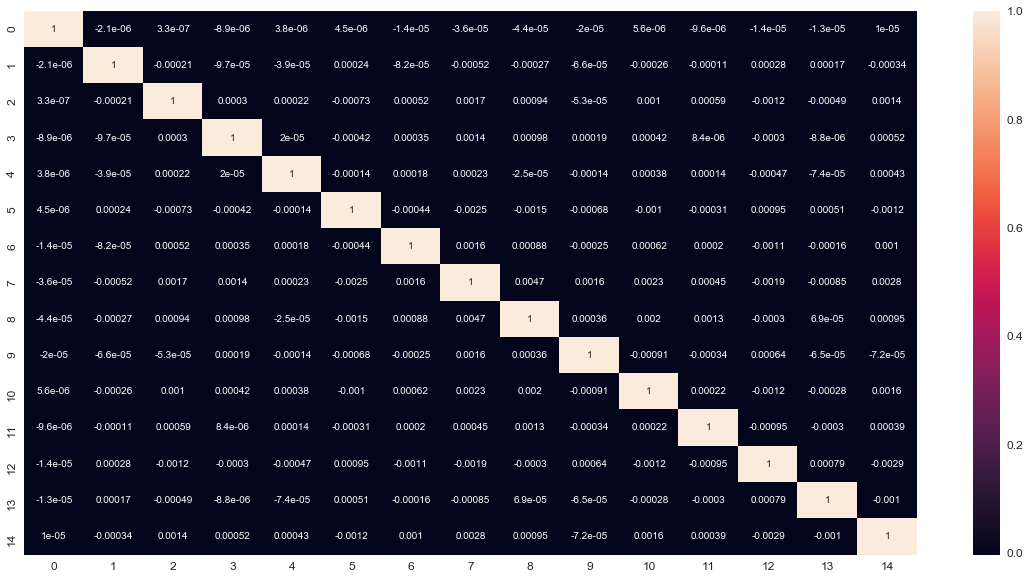

In [196]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [197]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004730638683252285 , min corr:  -0.0028823874164090072


#### Indeed - there is no correlation between any two components!
- We effectively have removed multicollinearity and our models will be much more stable

In [198]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8761, 15)

## (1) -> MODEL - Logistic Regression

In [199]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_res)

In [200]:
pred_res = model_pca.predict_proba(pca_final.transform(X_test_res))[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test_res, pred_res))

'0.88'

In [201]:
confusion = metrics.confusion_matrix(y_test_res,  pred_res.round())
confusion

array([[6419, 1605],
       [1467, 6557]])

In [202]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test_res,  pred_res.round()))

# precision
print("precision", metrics.precision_score(y_test_res,  pred_res.round()))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_res,  pred_res.round()))

accuracy 0.8085742771684945
precision 0.8033570203381524
recall 0.817173479561316


In [203]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# specificity (% of Non Churn correctly classified)
print("specificity = {}%".format("{:2.4}".format(TN / float(TN+FP))))

specificity = 0.8034%


In [204]:
# sensitivity (% of Churn correctly classified)
print("sensitivity = {}%".format("{:2.4}".format(TP / float(TP+FN))))

sensitivity = 0.814%


### 81% of the churned customers are correctly classified using this model with 15 features

In [205]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

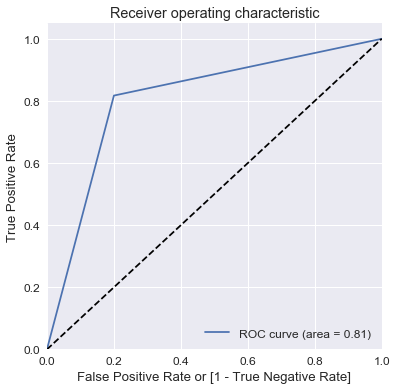

(array([0.        , 0.20002493, 1.        ]),
 array([0.        , 0.81717348, 1.        ]),
 array([2., 1., 0.]))

In [206]:
draw_roc(y_test_res, pred_res.round())

##  (2) -> MODEL - SVM

In [207]:
X_train = df_train_pca
y_train = y_train_res
X_test = pca_final.transform(X_test_res)
y_test = y_test_res

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [209]:
# To perform well on SVM the data should be balanced 
# Summarise the counts of 'label' to see how many labels of each digit are present
model = SVC(C=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [210]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion

array([[6710, 1314],
       [1664, 6360]])

In [211]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.814431704885344
precision 0.8287724784988272
recall 0.7926221335992024


In [212]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# specificity (% of Non Churn correctly classified)
print("specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

# sensitivity 
print("sensitivity", TP / float(TP+FN))

specificity = 0.8288
sensitivity 0.8012897062335801


In [213]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [214]:
# we have specified 'accuracy' as the metric
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy')  

In [215]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.7970297  0.79767162 0.79191757 0.80008029 0.79793925]
mean accuracy = 0.7969276855425406


### We do not tune SVM further and stop it here, since this is taking too much time computationally that is not possible with a single machine.

## (3) -> MODEL - Random Forests

In [217]:
X_train = df_train_pca
y_train = y_train_res
X_test = pca_final.transform(X_test_res)
y_test = y_test_res

In [218]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Create the random forest object with default parameters.
rfc_default = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [219]:
# fit to the created object
rfc_default.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [220]:
# Making predictions on test data
predictions = rfc_default.predict(X_test)

In [221]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [222]:
# Let's check the report of our default model
# precision tp / (tp + fp),recall tp / (tp + fn), f1-score weighted harmonic mean of the precision and recall,support number of occurrences of each class in y_true
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79      8024
         1.0       0.90      0.56      0.69      8024

   micro avg       0.75      0.75      0.75     16048
   macro avg       0.79      0.75      0.74     16048
weighted avg       0.79      0.75      0.74     16048



In [223]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7507  517]
 [3561 4463]]


In [224]:
# Accuracy on testing data
print(accuracy_score(y_test,predictions))

0.7458873379860419


### Tuning max_depth parameter

#### Now let's understand how the value of max_depth impact overall accuracy of the ensemble¶

In [231]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 50, 10)}

# instantiate the random forest model
rfc_maxdepth = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rfc_maxdepth = GridSearchCV(rfc_maxdepth, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1)
rfc_maxdepth.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(5, 50, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [232]:
# scores of GridSearch CV
scores = rfc_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.74590611,0.01335963,0.11350532,0.00240103,5,{'max_depth': 5},0.59606636,0.59017929,0.57104629,0.58391328,0.58056745,0.58435476,0.00851793,5,0.59929078,0.59427272,0.57674294,0.58576972,0.58045093,0.58730542,0.00840358
1,1.33956280,0.22227450,0.11271853,0.00610778,15,{'max_depth': 15},0.82325395,0.83462671,0.83288734,0.83525161,0.82280514,0.82976503,0.00555548,4,0.86012980,0.86464606,0.85802221,0.86498963,0.86060748,0.86167904,0.00270865
2,1.40655985,0.10964000,0.11442528,0.00149293,25,{'max_depth': 25},0.89737758,0.90594059,0.90513781,0.90524625,0.91233940,0.90520794,0.00474792,3,0.96865382,0.96768366,0.97347116,0.96996053,0.97307152,0.97056814,0.00232588
3,1.93627629,0.39250775,0.10839744,0.00429917,35,{'max_depth': 35},0.91249666,0.91704576,0.91784854,0.91970021,0.91809422,0.91703688,0.00242837,1,0.99344306,0.99280744,0.99417904,0.99381147,0.99451395,0.99375099,0.00059230
4,1.39473119,0.39548544,0.10873804,0.00419137,45,{'max_depth': 45},0.90888413,0.91570779,0.91651057,0.91956638,0.92210921,0.91655516,0.00446048,2,0.99611936,0.99658772,0.99715643,0.99575166,0.99652104,0.99642724,0.00047275


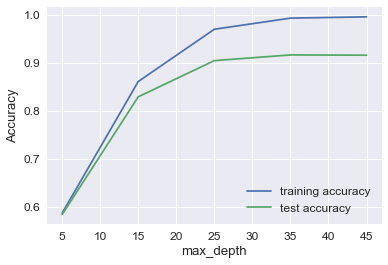

In [233]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above result we understood that after max_depth= 30 to 35 the testing accuracy is gradually flattening


### Tune n_estimators

In [234]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(30, 150, 30)}

# instantiate the model with a max_depth
rf = RandomForestClassifier(max_depth = 22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=22, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(30, 150, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [235]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.82392983,0.09913825,0.11831059,0.00321232,30,{'n_estimators': 30},0.88908215,0.89630720,0.89898314,0.90230193,0.90578158,0.89849061,0.00567825,4,0.94670815,0.94630670,0.94998662,0.95152873,0.95293370,0.94949278,0.00261282
1,9.70298595,0.06323709,0.11817098,0.00610009,60,{'n_estimators': 60},0.89135670,0.90099010,0.90607439,0.90430942,0.90310493,0.90116684,0.00517681,2,0.94858156,0.95012043,0.95393416,0.95507460,0.95022413,0.95158698,0.00247844
2,14.47207465,0.18775700,0.11686358,0.00294775,90,{'n_estimators': 90},0.89349746,0.90393364,0.90072250,0.90203426,0.90310493,0.90065835,0.00373883,3,0.94834738,0.95132477,0.95256256,0.95363618,0.95179635,0.95153345,0.00177450
3,14.04726124,2.20022661,0.10938740,0.00311192,120,{'n_estimators': 120},0.89149050,0.90259566,0.90473642,0.90430942,0.90471092,0.90156827,0.00510007,1,0.94894955,0.95186003,0.95393416,0.95397070,0.95099351,0.95194159,0.00189449


<Figure size 432x288 with 0 Axes>

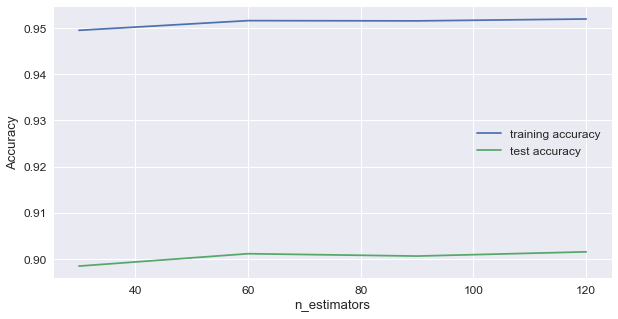

In [236]:
# plotting accuracies with n_estimators
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The test accuracy seems to flatten beyond n_estimators = 60. Even 60 gives a 90% accuracy

### Tuning max_features

In [237]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4,8,10]}

# instantiate the model
rf = RandomForestClassifier(max_depth=22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=22, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [2, 4, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [238]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.23158660,0.03873340,0.11493258,0.00179902,2,{'max_features': 2},0.88225850,0.89777897,0.89537062,0.89413812,0.89627944,0.89316491,0.00558150,1,0.94921718,0.95932022,0.95681119,0.95276644,0.95263264,0.95414953,0.00353164
1,2.44708152,0.15003115,0.11462145,0.00129943,4,{'max_features': 4},0.88466685,0.89256088,0.89978592,0.89025696,0.89681478,0.89281700,0.00524597,2,0.94925064,0.94647397,0.95319818,0.94350037,0.94554091,0.94759281,0.00335794
2,4.27187834,0.24394046,0.11493006,0.00119286,8,{'max_features': 8},0.87128713,0.89336366,0.89001873,0.89186296,0.88798180,0.88690253,0.00801369,3,0.93944868,0.93714037,0.93894688,0.93985415,0.94025557,0.93912913,0.00108490
3,3.23196139,1.05005102,0.10637999,0.00344671,10,{'max_features': 10},0.87342788,0.88774418,0.88841317,0.89092612,0.88503747,0.88510946,0.00613458,4,0.93389536,0.93864579,0.93680583,0.94005486,0.93908477,0.93769732,0.00217404


<Figure size 432x288 with 0 Axes>

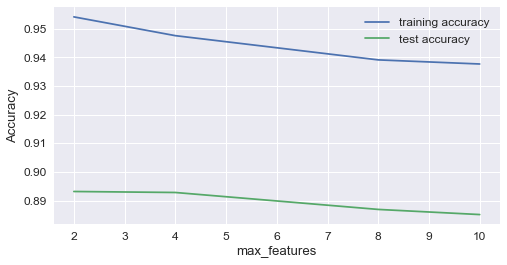

In [239]:
# plotting accuracies with max_features
plt.figure()
plt.figure(figsize=(8,4))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Test accuracy drop after max_features = 4

### Tune min_samples_leaf

In [243]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(50, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [244]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.07572751,0.06123851,0.11186705,0.00370783,50,{'min_samples_leaf': 50},0.68838641,0.69467487,0.68785122,0.68843683,0.69325482,0.69052079,0.00285509,1,0.70543958,0.69654088,0.70172621,0.69388506,0.70371981,0.70026231,0.00436852
1,0.88001018,0.13140856,0.11126561,0.00400149,150,{'min_samples_leaf': 150},0.60944608,0.61292481,0.60302382,0.62058351,0.61389186,0.61197345,0.00574803,2,0.61661983,0.61735581,0.61531513,0.61811735,0.61651167,0.61678396,0.00093418
2,0.92903605,0.10737149,0.10838752,0.00535859,250,{'min_samples_leaf': 250},0.58710195,0.58563018,0.57586299,0.58016595,0.58418094,0.58258845,0.00408085,3,0.58945537,0.58590927,0.58182791,0.58329431,0.58376263,0.58484990,0.00264829
3,0.68956470,0.18766544,0.11452017,0.01066762,350,{'min_samples_leaf': 350},0.55392026,0.56168049,0.55860316,0.56383833,0.57334047,0.56227587,0.00645779,4,0.55235515,0.56386324,0.56192292,0.56780625,0.56911086,0.56301168,0.00592723
4,0.61548729,0.04610889,0.10457721,0.00150508,450,{'min_samples_leaf': 450},0.55726519,0.53331549,0.54281509,0.55835118,0.53412741,0.54517476,0.01084467,5,0.55867791,0.53619698,0.54476114,0.55656654,0.53197966,0.54563644,0.01063884


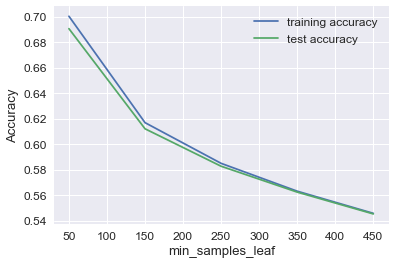

In [245]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_leaf shows a steady convergence after 50 - 100 onwards


#### Tuning min_samples_split

In [246]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 1000, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs = -1)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(100, 1000, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [247]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.72286229,0.02005456,0.10498691,0.00156037,100,{'min_samples_split': 100},0.77067166,0.78043885,0.77013647,0.78038009,0.77542827,0.77541080,0.00447789,1,0.80600161,0.80228824,0.79693563,0.79781896,0.79989296,0.80058748,0.00327684
1,1.51985903,0.11469938,0.10780940,0.00312731,200,{'min_samples_split': 200},0.70644902,0.71420926,0.70096334,0.71132227,0.71306210,0.70920088,0.00489756,2,0.72805433,0.72651546,0.71661314,0.72128186,0.72997926,0.72448881,0.00488418
2,1.39283915,0.03264836,0.10553060,0.00203632,300,{'min_samples_split': 300},0.68129516,0.67059138,0.66804924,0.67344754,0.67130621,0.67293796,0.00452065,3,0.69694233,0.67673625,0.68038271,0.68050445,0.68170870,0.68325489,0.00704335
3,1.32243614,0.03638215,0.10692015,0.00376820,400,{'min_samples_split': 400},0.65119079,0.63714209,0.64583891,0.64333512,0.67036938,0.64957448,0.01133518,4,0.65927338,0.64398501,0.66077880,0.64608283,0.67665752,0.65735551,0.01177972
4,1.28561296,0.06304520,0.11025605,0.00049187,500,{'min_samples_split': 500},0.62563554,0.63165641,0.62108643,0.63758030,0.63356531,0.62990419,0.00585440,5,0.63197511,0.63699318,0.63585575,0.63815481,0.63658259,0.63591229,0.00210481


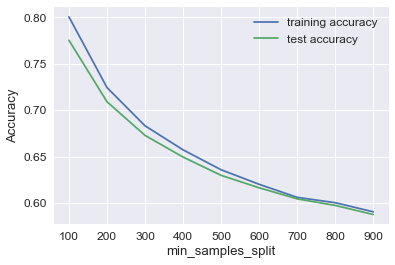

In [248]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_split shows a steady convergence after 200 - 300

### Grid Search to Find Optimal Hyperparameters

In [250]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [25,30,35, 40],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': [30,60,90], 
    'max_features': [3,4,5]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
# Instantiate the grid search model, Uncomment it to test it
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

### The above GridSearchCV takes quite longer time to run, the log for the output is added in below cell

In [251]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 28.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [25, 30, 35, 40], 'min_samples_leaf': range(50, 200, 50), 'min_samples_split': range(100, 400, 100), 'n_estimators': [30, 60, 90], 'max_features': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [364]:
# Fitting 5 folds for each of 324 candidates, totalling 1620 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.5s
# [Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
# [Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.3min
# [Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.3min
# [Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 21.4min
# [Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 28.1min finished
# GridSearchCV(cv=5, error_score='raise-deprecating',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
#             criterion='gini', max_depth=None, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators='warn', n_jobs=-1, oob_score=False,
#             random_state=None, verbose=0, warm_start=False),
#        fit_params=None, iid='warn', n_jobs=-1,
#        param_grid={'max_depth': [25, 30, 35, 40], 'min_samples_leaf': range(50, 200, 50), 'min_samples_split': range(100, 400, 100), 'n_estimators': [30, 60, 90], 'max_features': [3, 4, 5]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=1)

In [253]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.712439115773698 using {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 90}


###  The output from optimal run is below. It takes 28 mins on my laptop. So we will not run this everytime.
We can get accuracy of 0.712439115773698 using {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 90}

### Fitting the final model with the best parameters obtained from grid search.

In [254]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=30,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=100)

In [255]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [256]:
# predict
predictions = rfc.predict(X_test)

In [257]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [258]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      8024
         1.0       0.86      0.76      0.80      8024

   micro avg       0.81      0.81      0.81     16048
   macro avg       0.82      0.81      0.81     16048
weighted avg       0.82      0.81      0.81     16048



In [259]:
confusion = confusion_matrix(y_test,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[6995 1029]
 [1953 6071]]


In [260]:
print(accuracy_score(y_test,predictions))

0.8141824526420738


In [261]:

# specificity (% of Non Churn correctly classified)
print("specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

# sensitivity 
print("sensitivity", TP / float(TP+FN))

specificity = 0.8551
sensitivity 0.7817389360751006


##  (4) -> Decision Tree

#### We will work on normalised original features (not PCA'd). As we were interested in Model outcome without feature reduction as such and Decision Trees can work well with numeric and categorical data


In [262]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# read the normalised data 
unpickled_df = pd.read_pickle("./dummy_2.pkl")
df_var = unpickled_df


X = df_var.drop(['churned'],axis=1)

# Putting response variable to y
y = df_var['churned']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001186304,0.05987366,0.19363656,0.05467154,0.03521519,0.03745513,0.02577044,0.09644310,0.06452477,0.05823718,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.04427595,0.03971035,0.03680857,0.15490153,0.09977205,0.09915108,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.16447382,0.12113665,0.11999668,0.00040671,0.00662013,0.00000000,0.00013827,0.00364203,0.00232887,0.00000000,0.00000000,0.00000000,0.00051667,0.00949563,0.00232874,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.12425871,0.09723636,0.08244082,0.05137671,0.04666664,0.05893339,0.20188569,0.13625156,0.13027527,0.00783648,0.01180516,0.01131937,0.24990380,0.16080619,0.17293970,0.00114283,0.00909349,0.00000000,0.02242596,0.03551386,0.02404260,0.00000000,0.00000000,0.00141563,0.02205695,0.04166001,0.02328488,0.25623253,0.18362500,0.18302285,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01030928,0.03529412,0.01219512,0.06716418,0.18273754,0.00000000,0.13950000,0.15476190,0.00000000,0.17942122,0.19163987,0.00000000,0.00000000,0.03448276,0.00000000,0.07271010,0.00000000,0.00645321,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.33333333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.60816530,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.99924467,0.99993718,0.99956110,0.00000000,0.00546177,0.01063465,0.03030500,0.01000893,0.50414199,1.00000000,0.00000000,0.00000000,1.00000000
7000825294,0.17935034,0.210

In [263]:
from sklearn.tree import DecisionTreeClassifier

# First the defaults
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [264]:

# Making predictions
y_pred_dca = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_dca))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8034
         1.0       0.48      0.53      0.50       727

   micro avg       0.91      0.91      0.91      8761
   macro avg       0.72      0.74      0.73      8761
weighted avg       0.92      0.91      0.92      8761



In [265]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dca))
print(' accuracy = ',accuracy_score(y_test,y_pred_dca))


[[7622  412]
 [ 345  382]]
 accuracy =  0.913594338545828


#### Plotting the Decision Tree 

In [266]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df_var.columns[1:])


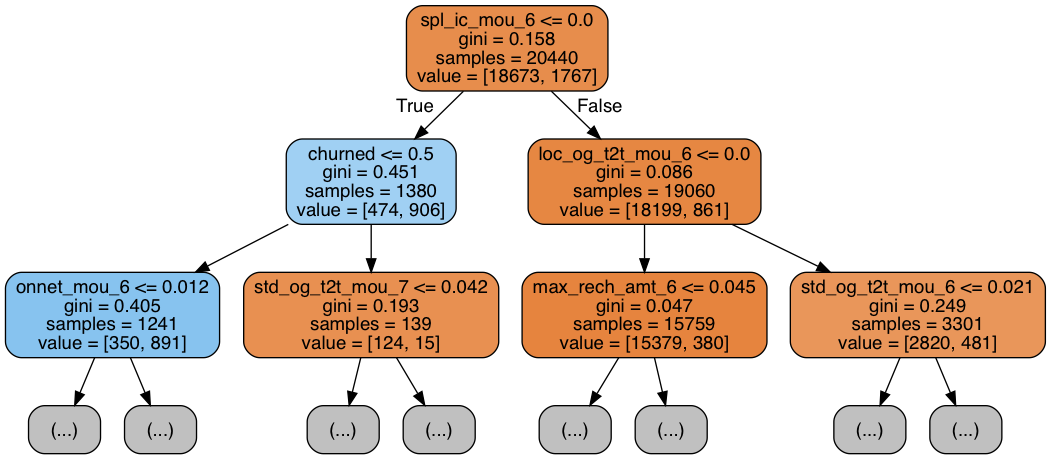

In [267]:
# plotting tree with max_depth=2
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Tuning max_depth parameter

In [268]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20, 4)}

# instantiate the random forest model
dtc_depth = DecisionTreeClassifier(criterion = "gini")


# fit tree on training data
tree = GridSearchCV(dtc_depth, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20, 4)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


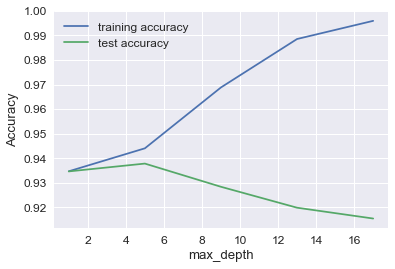

In [269]:
scores = tree.cv_results_
print (tree.best_estimator_)
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### After max_depth=5 the testing accuracy is gradually flattening


#### Tuning max_features

In [270]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4,8,16]}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini",max_depth = 20)


# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [2, 4, 8, 16]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


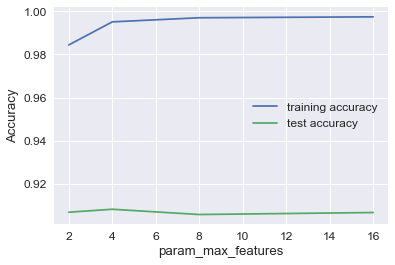

In [271]:
scores = tree.cv_results_
print (tree.best_estimator_)
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### max_features = 5


#### Tuning min_samples_leaf

In [272]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 300, 50)}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)
scores = tree.cv_results_

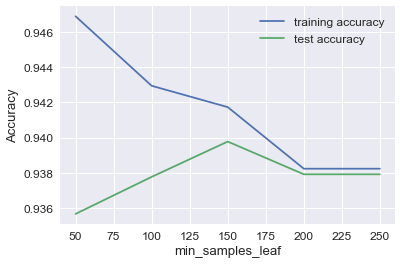

In [273]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### At values > 150, the model becomes more stable and the training and test accuracy start to converge.


#### Tuning min_samples_split

In [274]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

# fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)
scores = tree.cv_results_

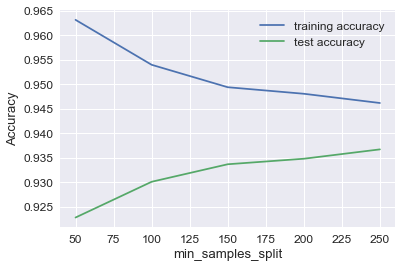

In [275]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### At values > 150, the model becomes more stable and the training and test accuracy start to converge.


### Grid Search to Find Optimal Hyperparameters


In [296]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(4, 8, 2),
    'max_features': [4,6],
    'min_samples_leaf': range(100, 250, 50),
    'min_samples_split': range(100, 300, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs = 4)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(4, 8, 2), 'max_features': [4, 6], 'min_samples_leaf': range(100, 250, 50), 'min_samples_split': range(100, 300, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [297]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


# printing the optimal accuracy score and hyperparameters
print('using',grid_search.best_params_)

best accuracy 0.936252446183953
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=150,
            min_samples_split=150, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 150, 'min_samples_split': 150}


In [298]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth=6, 
                                  min_samples_leaf=150,
                                  min_samples_split=150,
                                 max_features = 6)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=150,
            min_samples_split=150, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [299]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# predict
predictions = clf_gini.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8034
         1.0       0.62      0.47      0.54       727

   micro avg       0.93      0.93      0.93      8761
   macro avg       0.79      0.72      0.75      8761
weighted avg       0.93      0.93      0.93      8761



In [300]:
confusion = confusion_matrix(y_test,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[7828  206]
 [ 386  341]]


In [301]:
print('accuracy', accuracy_score(y_test,predictions))
# specificity (% of Non Churn correctly classified)
print("specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

# sensitivity 
print("sensitivity", TP / float(TP+FN))

accuracy 0.9324278050450862
specificity = 0.6234
sensitivity 0.9530070611151692


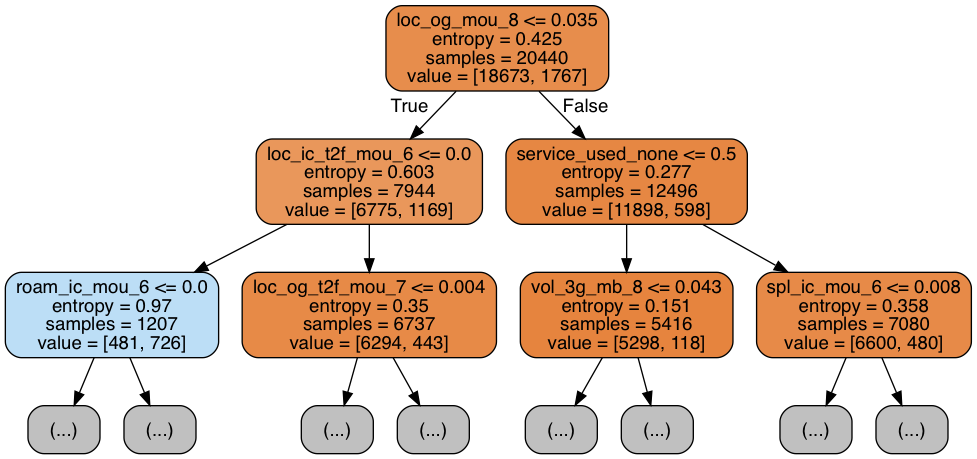

In [302]:
## Plotting the final tree 

# plotting tree with max_depth=2
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### We notice DecisionTree gives a very good accuracy (93%) and Sensitivity (95%). 

### One question may arise, is this algorithm working so good due to overfitting? We don't think so since

#### a) For Model train data... it used cross validation
#### b) The test data sample is pretty big (30% of 30,000) or around 9000 rows. And we are getting decent results on a pretty big sample of data. 


<h2><font size="5" color="green">Which is the final recommended model for CHURN PREDICTION ?</h2>

<h3><font size="4" color="blue">As mentioned earlier, for churn problem we need a model with high sensitivity (and good accuracy)</h3>


<h3><font size="3" color="red">Various Model and performance summary</h2>

<table style="width:100%" id="t01" >
  <tr>
    <th> <font size="4" color="green">Model</th>
    <th colspan="1"><font size="4" color="green">Accuracy</th>
    <th colspan="1"><font size="4" color="green">Sensitivity</th>      
     <th colspan="1"><font size="4" color="green">Specificity</th>
  </tr>
  <tr>
    <td><font size="3" color="brown">Decision Trees</td>
    <td> <font size="4" color="brown"> 93 %</td>
    <td><font size="4" color="brown"> 95 %</td>
    <td> 63 %</td>      
  </tr>
    
  <tr>
    <td>Logistic Regression</td>
    <td> 80 %</td>
    <td> 81 %</td>
    <td> 80 %</td>      
  </tr>
  <tr>
    <td>Random Forest</td>
    <td> 81 % </td>
    <td> 78 %</td>
    <td> 85 %</td>      
  </tr>
  <tr>
    <td><s>SVM (this was left untuned) </td>
    <td> <s>80 %</td>
    <td> <s>80 % </td>
    <td> <s>82 % </td>      
  </tr>
</table>




<h3><font size="5" color="RED">Decision Tree <font size="4" color="Blue">has the best Sensitivity (with Accuracy). This surprisingly we did without PCA... i.e. on normalised original feature set. We recommend this model or churn prediction since it will very accurately predict the true churners as churners (sensitivity)</h3>

<h3><font size="3" color="RED">Using PCA --> Logistic Regression <font size="3" color="blue">seems to be marginally better than Random Forest with higher sensitivity. Out of these 3 however, Logistic Regression is least computational demanding. Hence if speed is required and PCA is must... Then LR is a decent model. </h3>



<h2><font size="6" color="Brown">5)  MODEL TWO : Identifying Strong Churn Predictor Variables... </h2>


##  (1) -> Decision Trees for Predictor variables

### We will use the Optimised Decision Tree from previous section


,Entropy-importance
roam_og_mou_8,0.09164918
offnet_mou_8,0.03680593
arpu_8,0.00704116
onnet_mou_7,0.00486708
roam_og_mou_6,0.00119311
arpu_6,0.00000000
loc_og_t2m_mou_6,0.00000000


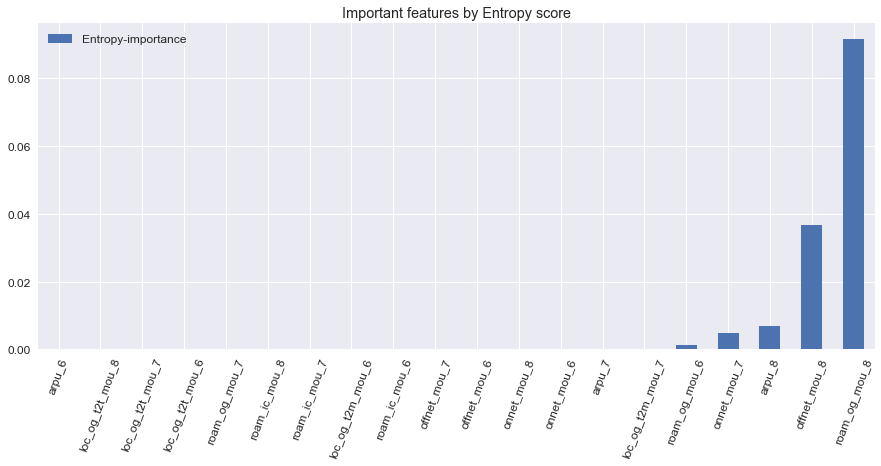

In [309]:
import pandas as pd
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train[:20], clf_gini.feature_importances_[:20]):
    feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Entropy-importance'})

importances.sort_values(by='Entropy-importance').plot(kind='bar', rot=70,figsize=(15,6), 
                                                   title ='Important features by Entropy score' )
importances.sort_values(by='Entropy-importance', ascending=False)[:7]

### With Tuned Decision Tree, we get important features by Entropy scores as 

%%HTML

<html>
<body>

<ul>
  <li> <b><font size="3" color="green">onnet_mou_7</li>
  <li><font size="3" color="green">arpu_8</li>
  <li><font size="3" color="green">offnet_mou_8</li>
  <li><font size="3" color="green">arpu_6</li>    
  <li><font size="3" color="green">roam_og_mou_8</li>
      <li><font size="3" color="green">onnet_mou_7</li>
</ul>  

</body>
</html>
	

## (2) -> Important features by RFE 

In [310]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
rfe = RFE(SVR(kernel='linear'), 10, step=1)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train,y_train)


,feature,ranking,support
23,loc_og_t2f_mou_8,1,True
137,day_of_last_rech_8,1,True
44,isd_og_mou_8,1,True
128,sep_vbc_3g,1,True
49,og_others_7,1,True
50,og_others_8,1,True
59,loc_ic_t2m_mou_8,1,True
80,total_ic_mou_8,1,True
74,std_ic_t2f_mou_8,1,True
65,loc_ic_mou_8,1,True


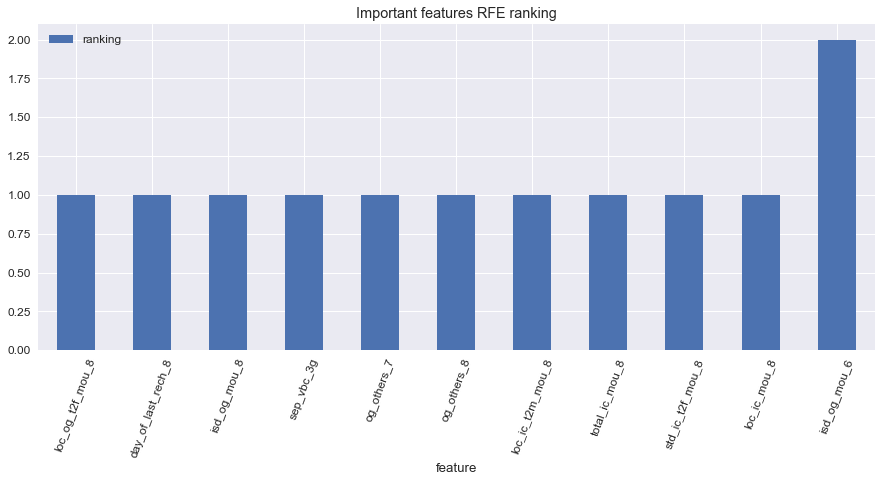

In [311]:
# Plot the top ranking features 
importances = pd.DataFrame({'feature': X_train.columns, 'ranking': rfe.ranking_, 'support':rfe.support_})
importances.sort_values(by='ranking', ascending=True)[:11].plot(kind='bar', rot=70,figsize=(15,6), x='feature',
                                                   title ='Important features RFE ranking' )
importances.sort_values(by='ranking', ascending=True)[:10]

### With RFE, we get top feature (All equal importance of rank = 1)

<html>
<body>

<ul>
  <li> <b><font size="3" color="green">loc_og_t2f_mou_8</li>
  <li><font size="3" color="green">day_of_last_rech_8</li>
  <li><font size="3" color="green">isd_og_mou_8</li>
  <li><font size="3" color="green">og_others_7</li>    
  <li><font size="3" color="green">og_others_8</li>
      <li><font size="3" color="green">total_ic_mou_8</li>
</ul>  

</body>
</html>

	

## (3) ->  Important features by LASSO Regression

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# read the normalised data 
unpickled_df = pd.read_pickle("./dummy_1.pkl")
df_var = unpickled_df
X = df_var.drop(['churned'],axis=1)

# Putting response variable to y
y = df_var['churned']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lasso = Lasso()

# list of alphas to tune
# params = {'alpha': [ 0.005, 0.01,0.2, 0.3, 0.6, 1.0, 5.0, 10.0, 20, 40]}
params = {'alpha': [ 0.009, 0.005, 0.001, 0.05, 0.01, 0.1, 1.0, 50.0, 100.0]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=2)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': [0.009, 0.005, 0.001, 0.05, 0.01, 0.1, 1.0, 50.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [314]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['mean_train_score','mean_test_score','param_alpha' ]].head(40)

,mean_train_score,mean_test_score,param_alpha
0,-0.15298524,-0.15375413,0.00900000
1,-0.15290171,-0.15374195,0.00500000
2,-0.15281316,-0.15376387,0.00100000
3,-0.15290765,-0.15346575,0.05000000
4,-0.15298421,-0.15374317,0.01000000
5,-0.15283075,-0.15333342,0.10000000
6,-0.15291864,-0.15316257,1.00000000
7,-0.15728675,-0.15730836,50.00000000
8,-0.16009184,-0.16010968,100.00000000


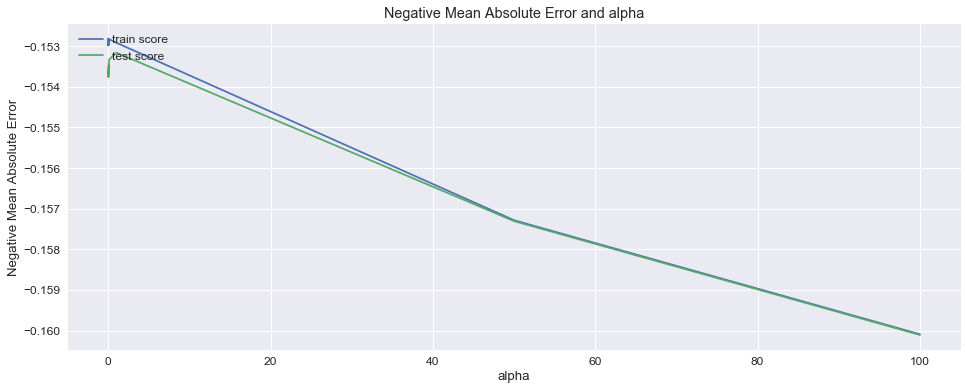

In [315]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

In [316]:
print(model_cv.best_score_)

print(model_cv.best_estimator_)

-0.15316256705029682
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


#### Best alpha = 1.0 as per Algo

In [317]:

lasso = Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [318]:
# Evaluate Model accuracy and effectiveness
y_pred_lasso = lasso.predict(X_test)

y_pred_lasso = pd.DataFrame(data=y_pred_lasso, columns=['val'])
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_lasso['predicted'] = y_pred_lasso['val'].apply( lambda x: 1 if abs(x) > 0.5 else 0)
# Let's see the head
y_pred_lasso.groupby('predicted').count()


# Printing classification report
print(classification_report(y_test, y_pred_lasso['predicted']))
print(' accuracy = ',accuracy_score(y_test,y_pred_lasso['predicted']))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8085
           1       0.68      0.10      0.17       676

   micro avg       0.93      0.93      0.93      8761
   macro avg       0.80      0.55      0.57      8761
weighted avg       0.91      0.93      0.90      8761

 accuracy =  0.9267206939847049


,feature,score
143,usage_diff_og_mou,0.00010239
13,roam_og_mou_7,0.00010058
12,roam_og_mou_6,0.00004165
78,total_ic_mou_6,0.00003871
0,arpu_6,0.00002940
93,total_rech_amt_6,0.00002933
1,arpu_7,0.00001980
40,std_og_mou_7,0.00001109
94,total_rech_amt_7,0.00000626
34,std_og_t2m_mou_7,0.00000137


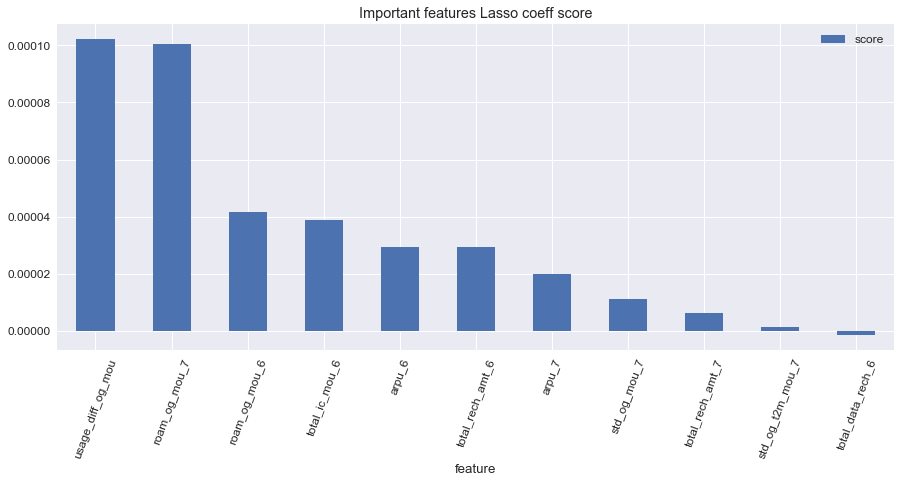

In [319]:
# Plot the top ranking features 
importances = pd.DataFrame({'feature': X_train.columns, 'score': lasso.coef_})
importances = importances[importances.score != 0.0]
importances.sort_values(by='score', ascending=False)[:11].plot(kind='bar', rot=70,figsize=(15,6), x='feature',
                                                   title ='Important features Lasso coeff score' )
importances.sort_values(by='score', ascending=False)[:10]

### through Lasso Regression, we get important features


<html>
<body>

<ul>
  <li> <b><font size="3" color="green">usage_diff_og_mou</li>
  <li><font size="3" color="green">total_rech_num_6</li>
  <li><font size="3" color="green">roam_og_mou_6</li>
  <li><font size="3" color="green">roam_og_mou_7</li>    
  <li><font size="3" color="green">total_ic_mou_6</li>
      <li><font size="3" color="green">arpu_6</li>
</ul>  

</body>
</html>



## (4) ->  Important features by Logistic Regression


In [320]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37223
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Nov 2018   Deviance:                          nan
Time:                        17:02:58   Pearson chi2:                 7.94e+19
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.346e+29   5.81e+10  -2.31e+18      0.000   -1.35e+29   -1.35e+29
arpu_6              -2.574e+27   1.81e+07  -1.42e+20      0.000   -2.57e+27   -2.57e+27
arpu_7              -5.884e+26   1.68e+07  -3.51e+19      0.000   -5.88e+26   -5.88e+26
arpu_8              -1.177e+27   1.79e+07  -6.59e+19      0.000   -1.18e+27   -1.18e+27
onnet_mou_6         -2.595e+28   4.17e+08  -6.23e+19      0.000    -2.6e+28    -2.6e+28
onnet_mou_7          1.334e+28   3.13e+08   4.26e+19      0.000    1.33e+28    1.33e+28
onnet_mou_8         -2.437e+27    3.2e+08  -7.61e+18      0.000   -2.44e+27   -2.44e+27
offnet_mou_6        -3.057e+27   4.15e+08  -7.36e+18      0.000   -3.06e+27   -3.06e+27
offnet_mou_7          5.36e+27    3.3e+08   1.63e+19      0.000    5.36e+27    5.36e+27
offnet_mou_8         1.075e+28   3.29e+08   3.27e+19      0.000    1.08e+28    1.08e+28
roam_ic_mou_6        2.076e+27   1.33e+07   1.56e+20      0.000    2.08e+27    2.08e+27
roam_ic_mou_7       -1.268e+27   1.51e+07  -8.42e+19      0.000   -1.27e+27   -1.27e+27
roam_ic_mou_8        8.467e+26   1.58e+07   5.36e+19      0.000    8.47e+26    8.47e+26
roam_og_mou_6        6.285e+27   1.88e+08   3.34e+19      0.000    6.29e+27    6.29e+27
roam_og_mou_7       -3.082e+27   1.16e+08  -2.66e+19      0.000   -3.08e+27   -3.08e+27
roam_og_mou_8       -2.816e+27    1.3e+08  -2.17e+19      0.000   -2.82e+27   -2.82e+27
loc_og_t2t_mou_6    -6.967e+28   2.24e+11  -3.11e+17      0.000   -6.97e+28   -6.97e+28
loc_og_t2t_mou_7    -8.141e+28    2.1e+11  -3.87e+17      0.000   -8.14e+28   -8.14e+28
loc_og_t2t_mou_8     1.375e+29   2.04e+11   6.73e+17      0.000    1.38e+29    1.38e+29
loc_og_t2m_mou_6    -7.104e+28   1.77e+11     -4e+17      0.000    -7.1e+28    -7.1e+28
loc_og_t2m_mou_7     -6.06e+28   1.78e+11   -3.4e+17      0.000   -6.06e+28   -6.06e+28
loc_og_t2m_mou_8     1.067e+29   1.72e+11    6.2e+17      0.000    1.07e+29    1.07e+29
loc_og_t2f_mou_6     -9.87e+27   2.43e+10  -4.07e+17      0.000   -9.87e+27   -9.87e+27
loc_og_t2f_mou_7    -7.121e+27   2.15e+10  -3.31e+17      0.000   -7.12e+27   -7.12e+27
loc_og_t2f_mou_8     1.116e+28    1.9e+10   5.87e+17      0.000    1.12e+28    1.12e+28
loc_og_t2c_mou_6      6.35e+25   1.53e+07   4.14e+18      0.000    6.35e+25    6.35e+25
loc_og_t2c_mou_7      7.96e+26   1.87e+07   4.27e+19      0.000    7.96e+26    7.96e+26
loc_og_t2c_mou_8    -1.482e+26   1.63e+07  -9.09e+18      0.000   -1.48e+26   -1.48e+26
loc_og_mou_6        -1.251e+29   2.82e+11  -4.44e+17      0.000   -1.25e+29   -1.25e+29
loc_og_mou_7        -1.301e+29   2.81e+11  -4.63e+17      0.000    -1.3e+29    -1.3e+29
loc_og_mou_8         2.277e+29   2.71e+11    8.4e+17      0.000    2.28e+29    2.28e+29
std_og_t2t_mou_6    -8.029e+28   3.32e+11  -2.42e+17      0.000   -8.03e+28   -8.03e+28
std_og_t2t_mou_7    -9.767e+28   3.28e+11  -2.98e+17      0.000   -9.77e+28   -9.7

In [321]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train_res_df,y_train_res_df)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False  True False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False]
[ 53   8  68 113  75 120 111 128  30   1  98  52 112  57  12  54  11  29
  48  65   1  26  25  94 

In [322]:
# X_train_res_df = X_train_res.to_frame
X_train_res_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
0,0.12490691,0.23039747,0.25569088,0.00103489,0.15999306,0.22019992,0.00274915,0.16141329,0.15308106,0.00959653,0.00000000,0.00000000,0.00867054,0.00000000,0.00000000,0.00000000,0.00149406,0.00255123,0.00000000,0.00415178,0.01438321,0.00000000,0.02131887,0.02227051,0.03652021,0.05705651,0.03388136,0.00000000,0.00701526,0.01669814,0.00000000,0.16119963,0.22680794,0.00000000,0.16371606,0.14466849,0.00000000,0.00000000,0.00000000,0.00000000,0.30208652,0.35740108,0.00000000,0.00003567,0.00000000,0.00000000,0.03077835,0.02183770,0.00000000,0.00000000,0.00000000,0.00000000,0.30345671,0.36244256,0.00000000,0.00075436,0.00573851,0.00000000,0.00681296,0.01845143,0.00000000,0.00047698,0.00128095,0.00000000,0.00650553,0.02189876,0.00000000,0.05589438,0.06168951,0.00000000,0.00107132,0.00899475,0.00000000,0.01517931,0.01958286,0.00000000,0.04330783,0.06541061,0.00000000,0.03337816,0.05874763,0.00000000,0.00000000,0.06400000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00083890,0.07216495,0.08235294,0.08536585,0.10086663,0.28857008,0.23500000,0.07750000,0.11904762,0.14714538,0.09967846,0.16077170,0.16666667,0.03125000,0.03448276,0.08096740,0.07271010,0.11880268,0.01662029,0.00697902,0.00222466,0.04435612,0.13687562,0.33333333,0.33333333,0.33333333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.15907394,0.12340763,0.05967653,0.02804409,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,1.00000000,0.99981117,1.00000000,0.99962380,0.00601563,0.00546177,0.02184105,0.04495296,0.02545840,0.36804374,0.00000000,0.00000000,0.00000000,0.00000000
1,0.02207938,0.16626285,0.15963472,0.00000000,0.00565308,0.00957347,0.00000000,0.03329108,0.02437300,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00656353,0.0136740

In [323]:
col = X_train_res_df.columns[rfe.support_]
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train_res_df[col], y_train_res_df)

#Comparing the model with StatsModels
logm4 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37353
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15260.
Date:                Sun, 18 Nov 2018   Deviance:                       30521.
Time:                        17:04:31   Pearson chi2:                 4.85e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9418      0.154    -12.644      0.000      -2.243      -1.641
roam_ic_mou_6          6.1957      0.412     15.038      0.000       5.388       7.003
loc_og_t2m_mou_8      -8.0903      0.482    -16.770      0.000      -9.036      -7.145
loc_ic_t2m_mou_7       9.6527      0.517     18.660      0.000       8.639      10.667
loc_ic_t2m_mou_8     -11.9906      1.385     -8.656      0.000     -14.706      -9.276
loc_ic_mou_8          -4.2391      1.242     -3.414      0.001      -6.673      -1.805
total_ic_mou_8        -9.5097      0.742    -12.812      0.000     -10.965      -8.055
spl_ic_mou_8          -5.8491      0.335    -17.481      0.000      -6.505      -5.193
total_rech_num_8      -4.9194      0.192    -25.559      0.000      -5.297      -4.542
last_day_rch_amt_8    -9.8903      0.322    -30.674      0.000     -10.522      -9.258
vol_2g_mb_8           -4.9095      0.391    -12.548      0.000      -5.676      -4.143
sep_vbc_3g           -30.7198      2.730    -11.253      0.000     -36.071     -25.369
usage_diff_og_mou      6.9994      0.278     25.170      0.000       6.454       7.544
======================================================================================
"""

In [324]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [326]:
df_logistic = df[col]
df_logistic['churned'] = df['churned']
# Calculating Vif value
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
4,loc_ic_mou_8,16.38000000
5,total_ic_mou_8,12.26000000
3,loc_ic_t2m_mou_8,10.17000000
2,loc_ic_t2m_mou_7,4.96000000
11,usage_diff_og_mou,3.38000000
1,loc_og_t2m_mou_8,2.38000000
7,total_rech_num_8,2.30000000
8,last_day_rch_amt_8,1.73000000
9,vol_2g_mb_8,1.09000000
6,spl_ic_mou_8,1.08000000


#### Considering the value of p and VIF, 'total_ic_mou_8' variable is eligible for elimination 

In [327]:
df_logistic = df_logistic.drop(['total_ic_mou_8'], axis=1)

In [328]:
col_list = df_logistic.columns.tolist()
col_list

['roam_ic_mou_6',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'sep_vbc_3g',
 'usage_diff_og_mou',
 'churned']

In [329]:
col_list.remove('churned')

In [330]:
logm6 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df[col_list])), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37354
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15371.
Date:                Sun, 18 Nov 2018   Deviance:                       30742.
Time:                        17:05:37   Pearson chi2:                 6.56e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1325      0.153    -13.966      0.000      -2.432      -1.833
roam_ic_mou_6          5.8193      0.405     14.377      0.000       5.026       6.613
loc_og_t2m_mou_8      -7.9022      0.485    -16.299      0.000      -8.852      -6.952
loc_ic_t2m_mou_7       9.9108      0.522     19.003      0.000       8.889      10.933
loc_ic_t2m_mou_8     -12.3542      1.408     -8.774      0.000     -15.114      -9.594
loc_ic_mou_8         -14.5085      0.983    -14.764      0.000     -16.434     -12.582
spl_ic_mou_8          -5.9865      0.336    -17.810      0.000      -6.645      -5.328
total_rech_num_8      -5.1781      0.193    -26.897      0.000      -5.555      -4.801
last_day_rch_amt_8   -10.1511      0.321    -31.648      0.000     -10.780      -9.522
vol_2g_mb_8           -4.9239      0.391    -12.588      0.000      -5.691      -4.157
sep_vbc_3g           -30.5742      2.730    -11.200      0.000     -35.925     -25.224
usage_diff_og_mou      7.2874      0.277     26.310      0.000       6.745       7.830
======================================================================================
"""

In [331]:
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,loc_ic_t2m_mou_8,10.15000000
4,loc_ic_mou_8,7.24000000
2,loc_ic_t2m_mou_7,4.96000000
10,usage_diff_og_mou,3.34000000
1,loc_og_t2m_mou_8,2.38000000
6,total_rech_num_8,2.28000000
7,last_day_rch_amt_8,1.72000000
8,vol_2g_mb_8,1.09000000
5,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000


#### Considering the value of VIF, 'loc_ic_t2m_mou_8' variable is eligible for elimination 

In [332]:
df_logistic = df_logistic.drop(['loc_ic_t2m_mou_8'], axis=1)
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,loc_ic_mou_8,3.91000000
2,loc_ic_t2m_mou_7,3.58000000
9,usage_diff_og_mou,3.30000000
1,loc_og_t2m_mou_8,2.28000000
5,total_rech_num_8,2.28000000
6,last_day_rch_amt_8,1.72000000
7,vol_2g_mb_8,1.09000000
4,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000
8,sep_vbc_3g,1.03000000


#### Further tuning the model to avoid multicollinearity, lets drop 'loc_ic_mou_8' variable

In [333]:
df_logistic = df_logistic.drop(['loc_ic_mou_8'], axis=1)
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
8,usage_diff_og_mou,3.29000000
4,total_rech_num_8,2.26000000
1,loc_og_t2m_mou_8,2.11000000
2,loc_ic_t2m_mou_7,2.11000000
5,last_day_rch_amt_8,1.70000000
6,vol_2g_mb_8,1.09000000
3,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000
7,sep_vbc_3g,1.03000000


In [334]:
final_col = df_logistic.drop(['churned'], axis=1).columns
final_col

Index(['roam_ic_mou_6', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'sep_vbc_3g',
       'usage_diff_og_mou'],
      dtype='object')

In [335]:
logsk.fit(X_train_res_df[final_col], y_train_res_df)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [336]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_res_df[final_col])

In [337]:
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test_res_df)
# Putting mobile_number to index
y_test_res_df['mobile_number'] = y_test_res_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_res_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_res_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churned_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','churned','churned_prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,churned,churned_prob
0,0,0.00000000,0.23497813
1,1,0.00000000,0.16043456
2,2,0.00000000,0.31303933
3,3,0.00000000,0.12338338
4,4,0.00000000,0.00019070


In [338]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted
0,0,0.00000000,0.23497813,0
1,1,0.00000000,0.16043456,0
2,2,0.00000000,0.31303933,0
3,3,0.00000000,0.12338338,0
4,4,0.00000000,0.00019070,0


#### Model evaluation

In [339]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.predicted )
confusion

array([[6499, 1525],
       [1218, 6806]])

In [340]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.predicted)

0.8290752741774676

In [341]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [342]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8421666450693275

In [343]:
# Let us calculate specificity
TN / float(TN+FP)

0.8169487456487816

In [344]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18305125435121833


In [345]:
# positive predictive value 
print (TP / float(TP+FP))

0.8099451645064806


In [346]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8482053838484547


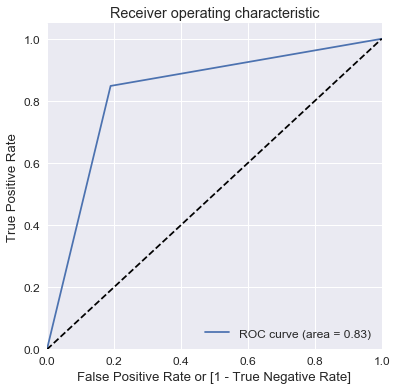

(array([0.        , 0.19005484, 1.        ]),
 array([0.        , 0.84820538, 1.        ]),
 array([2, 1, 0]))

In [347]:
draw_roc(y_pred_final.churned, y_pred_final.predicted)

In [348]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churned_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00000000,0.23497813,0,1,1,1,0,0,0,0,0,0,0
1,1,0.00000000,0.16043456,0,1,1,0,0,0,0,0,0,0,0
2,2,0.00000000,0.31303933,0,1,1,1,1,0,0,0,0,0,0
3,3,0.00000000,0.12338338,0,1,1,0,0,0,0,0,0,0,0
4,4,0.00000000,0.00019070,0,1,0,0,0,0,0,0,0,0,0


In [349]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

def calculation_for_cutoffs(y_pred_final):
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix( y_pred_final.churned, y_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
calculation_for_cutoffs(y_pred_final)

                 prob   accuracy      sensi      speci
0.00000000 0.00000000 0.50000000 0.00000000 1.00000000
0.10000000 0.10000000 0.64923978 0.32053838 0.97794118
0.20000000 0.20000000 0.71697408 0.47819043 0.95575773
0.30000000 0.30000000 0.76613908 0.60568295 0.92659521
0.40000000 0.40000000 0.80502243 0.71871884 0.89132602
0.50000000 0.50000000 0.82907527 0.80994516 0.84820538
0.60000000 0.60000000 0.82951147 0.87362911 0.78539382
0.70000000 0.70000000 0.81218843 0.92360419 0.70077268
0.80000000 0.80000000 0.75068544 0.96261216 0.53875872
0.90000000 0.90000000 0.57328016 0.98791127 0.15864905


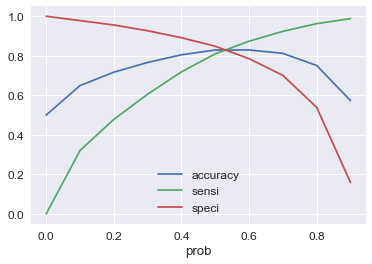

In [350]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.57 is the optimum point to take it as a cutoff probability.

In [351]:
y_pred_final['final_predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.57 else 0)
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00000000,0.23497813,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.00000000,0.16043456,0,1,1,0,0,0,0,0,0,0,0,0
2,2,0.00000000,0.31303933,0,1,1,1,1,0,0,0,0,0,0,0
3,3,0.00000000,0.12338338,0,1,1,0,0,0,0,0,0,0,0,0
4,4,0.00000000,0.00019070,0,1,0,0,0,0,0,0,0,0,0,0


In [352]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.final_predicted)

0.8310069790628115

In [353]:
metrics.confusion_matrix( y_pred_final.churned, y_pred_final.final_predicted )

array([[6862, 1162],
       [1550, 6474]])

In [354]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
# y_pred_final.head()

#### Model eval

In [355]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.predicted )
confusion

array([[6499, 1525],
       [1218, 6806]])

In [356]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.predicted)

0.8290752741774676

In [357]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [358]:
print ('sensitivity = ', TP / float(TP+FN))
print ('specificity = ', TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print()
print ('false postive rate = ', FP/ float(TN+FP))

# positive predictive value 
print ('positive predictive value',TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value', TN / float(TN+ FN))

sensitivity =  0.8421666450693275
specificity =  0.8169487456487816

false postive rate =  0.18305125435121833
positive predictive value 0.8099451645064806
Negative predictive value 0.8482053838484547


### through Logistic  Regression, we get important features

<html>
<body>

<ul>
  <li> <b><font size="3" color="green">usage_diff_og_mou </li>
  <li><font size="3" color="green">total_rech_num_8</li>
        <li><font size="3" color="green">loc_og_t2m_mou_8</li>
              <li><font size="3" color="green">loc_ic_t2m_mou_7</li>
                    <li><font size="3" color="green">last_day_rch_amt_8</li>
                          <li><font size="3" color="green">vol_2g_mb_8</li>
                               <li><font size="3" color="green">roam_ic_mou_6</li>
                                    <li><font size="3" color="green">sep_vbc_3g</li>
</ul>  

</body>
</html>

<h3><font size="6" color="brown">6) Clear actionable recommendations are provided based on supporting evidence</h3>


<h3><font size="5" color="red">Important Features : summary</h3>

<h4><font size="4" color="green">
We tried 4 different approaches namely Decision trees, Simple RFE, Logistic regression and Lasso Regression</h4>


<p>
    
<table >
  <tr>
    <th> <font size="4" color="green">Model</th>
    <th> <font size="4" color="green">Important features</th>
  </tr>
  <tr>
    <td><font size="4">Lasso</td>
    <td> 
        <ul>
          <li>usage_diff_og_mou</li>
          <li>total_rech_num_6</li>
          <li>roam_og_mou_6</li>
          <li>roam_og_mou_7</li>    
          <li>total_ic_mou_6</li>
          <li>arpu_6</li>
        </ul>   
       </td>
  </tr>

<tr>
    <td><font size="4">RFE </td>
    <td>
        <ul>
          <li>loc_og_t2f_mou_8</li>
          <li>day_of_last_rech_8</li>
          <li>isd_og_mou_8</li>
          <li>og_others_7</li>    
          <li>og_others_8</li>
          <li>total_ic_mou_8</li>
         </ul>   
    </td>
  </tr>
  <tr>
    <td><font size="4">Decision Tree</td>
    <td>
        <ul>
         <li>onnet_mou_7</li>
          <li>arpu_8</li>
          <li>offnet_mou_8</li>
          <li>arpu_6</li>    
          <li>roam_og_mou_8</li>
          <li>onnet_mou_7</li>
         </ul>   
     </td>
  </tr>
  
     <tr>
        <td><font size="4">Logistic regression</td>
        <td> 
            <ul>
               <li>usage_diff_og_mou</li>
               <li>total_rech_num_8</li>
               <li>loc_og_t2m_mou_8</li>
               <li>loc_ic_t2m_mou_7</li>
               <li>last_day_rch_amt_8</li>
               <li>vol_2g_mb_8</li>
               <li>roam_ic_mou_6</li>
               <li>sep_vbc_3g</li>
             </ul>                   
         </td>
    </tr>
</table>


<h3><font size="4" color="red">Summary of important features</h2>
<table >
  <tr>
    <th> <font size="4" color="green">Feature</th>
  </tr>
  <tr>
    <td>Total Recharge in previous months</td>


  </tr>
  <tr>
    <td>Roaming Outgoing Minutes of voice call in 6th and 7th   </td>

  
  </tr>
  <tr>
    <td>ISD outgoing and incoming voice call </td>

   
  </tr>
    <tr>
    <td>Average Revernue Per user in last 3 months here </td>

   
  </tr>
    <tr>
    <td>Outgoing others </td>
    
   
  </tr>
    <tr>
    <td>Mobile Internet usage </td>
    
   
  </tr>
    <tr>
    <td>All types of calls within and outside the operator network</td>
    
   
  </tr>
    
  
</table>


## Visual plotting of Important Features used for prediction

## 1) Average revenue per user
### In the below graph, arpu of users is plotted for 3 months. We can see that arpu of churned customers have reduced drastically from 7th to 8th month

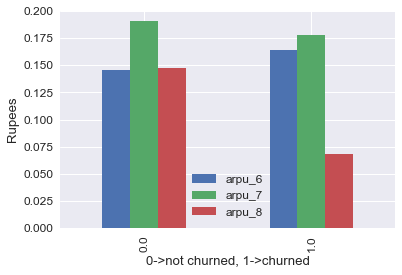

In [359]:
df.groupby('churned')['arpu_6','arpu_7','arpu_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Rupees')
plt.show()

## 2) Outgoing calls to Others
### In the below graph, Outgoing calls of users is plotted for 3 months. We can see that outgoing calls to others of churned customers is extremely low throughout

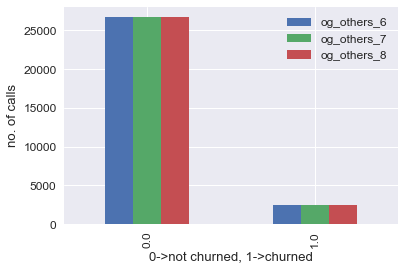

In [360]:
df.groupby('churned')['og_others_6','og_others_7','og_others_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('no. of calls')
plt.show()

## 3) Average calls within the same network
### In the below graph, avg calls within the same network of users is plotted for 3 months. We can see that the calls usage of churned customers have reduced drastically and gradually

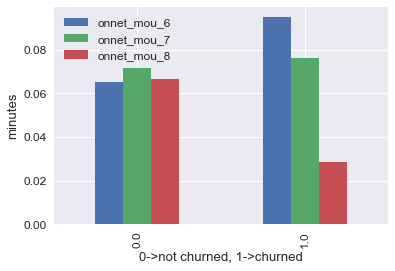

In [361]:
df.groupby('churned')['onnet_mou_6','onnet_mou_7','onnet_mou_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('minutes')
plt.show()

## 4) Average total recharge
### In the below graph, total avg recharge of users is plotted for 3 months. We can see that recharge amount of churned customers have reduced drastically and gradually

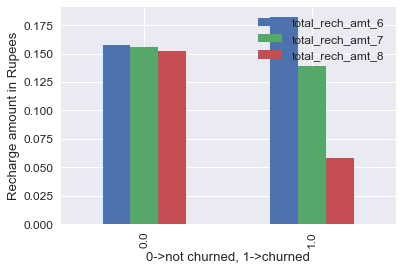

In [362]:
df.groupby('churned')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Recharge amount in Rupees')
plt.show()

## 5) Average 2g volume consumption in MB
### In the below graph, avg 2g volume consumption of users is plotted for 3 months. We can see that 2g volume of churned customers have reduced gradually

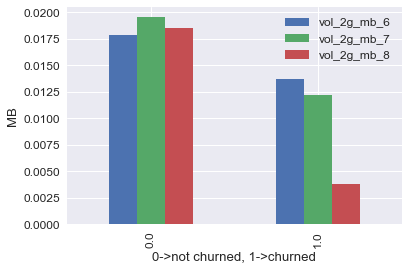

In [363]:
df.groupby('churned')['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('MB')
plt.show()

<head>

</head>
<body>

<h3><font size="5" color="blue">Recommend Strategies to manage customer churn based on our observations</h2>
<ul>
  <li> <b><font size="3" color="green">Recommendation 1 : Company has to identify customers with high arpu and track if outgoing calls to other networks is reducing. If so, then company has to suggest him\her offers which are available if any. Or compnay has to call customers and know if there are any grievances.</li>
  <li><font size="3" color="green">Recommendation 2 : Company has to identify customers with high arpu and track if their 2g internet consumption is going down. Company has to address if there are any internet speed access issues or make it competitive in terms of pricing </li>
      <li><font size="3" color="green">Recommendation 3 : Company has to identify customers with high arpu and track if total recharge value is decresing on monthly basis. Company has to provide offers such as cashback, coupons on recharge to customers. This will help retain customers.</li>
</ul>
      
</body>